# Importing Necessary Modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
sb.set()

fashiondata_raw = pd.read_csv('fashion_data_2018_2022.csv')
fashiondata_extracted = pd.DataFrame(fashiondata_raw[["gender", "color", "price", "material", "year_of_sale", "age_group", "season", "category", "sales_count", "average_rating"]])

df = fashiondata_extracted.groupby(['year_of_sale', 'season', 'category']).sum()
pivoted = pd.pivot_table(df, values='sales_count', index=['year_of_sale', 'season'], columns=['category'])
pivoted = pivoted.fillna(0).astype(int)

summed_sales = pivoted.sum(axis=1)
finaldataset = pd.DataFrame(summed_sales, columns=['total_sales'])

# Splitting Train and Test Dataset

In [12]:
Tree = DecisionTreeClassifier(max_depth = 5)

y = pd.DataFrame(fashiondata_raw['gender'])
X = pd.DataFrame(fashiondata_raw['sales_count'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (495, 1)
Shape of X_test: (165, 1)
Shape of y_train: (495, 1)
Shape of y_test: (165, 1)


# Fitting Data into Decision Tree

[Text(0.3684210526315789, 0.9166666666666666, 'sales_count <= 53.5\ngini = 0.5\nsamples = 495\nvalue = [249, 246]\nclass = Male'),
 Text(0.21052631578947367, 0.75, 'sales_count <= 52.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]\nclass = Female'),
 Text(0.15789473684210525, 0.5833333333333334, 'sales_count <= 51.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Female'),
 Text(0.10526315789473684, 0.4166666666666667, 'sales_count <= 50.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Female'),
 Text(0.05263157894736842, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Female'),
 Text(0.15789473684210525, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Female'),
 Text(0.21052631578947367, 0.4166666666666667, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Female'),
 Text(0.2631578947368421, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Female'),
 Text(0.5263157894736842, 0.75, 'sales_count <= 57.5\ngini = 0.5\nsamples = 482\nvalue 

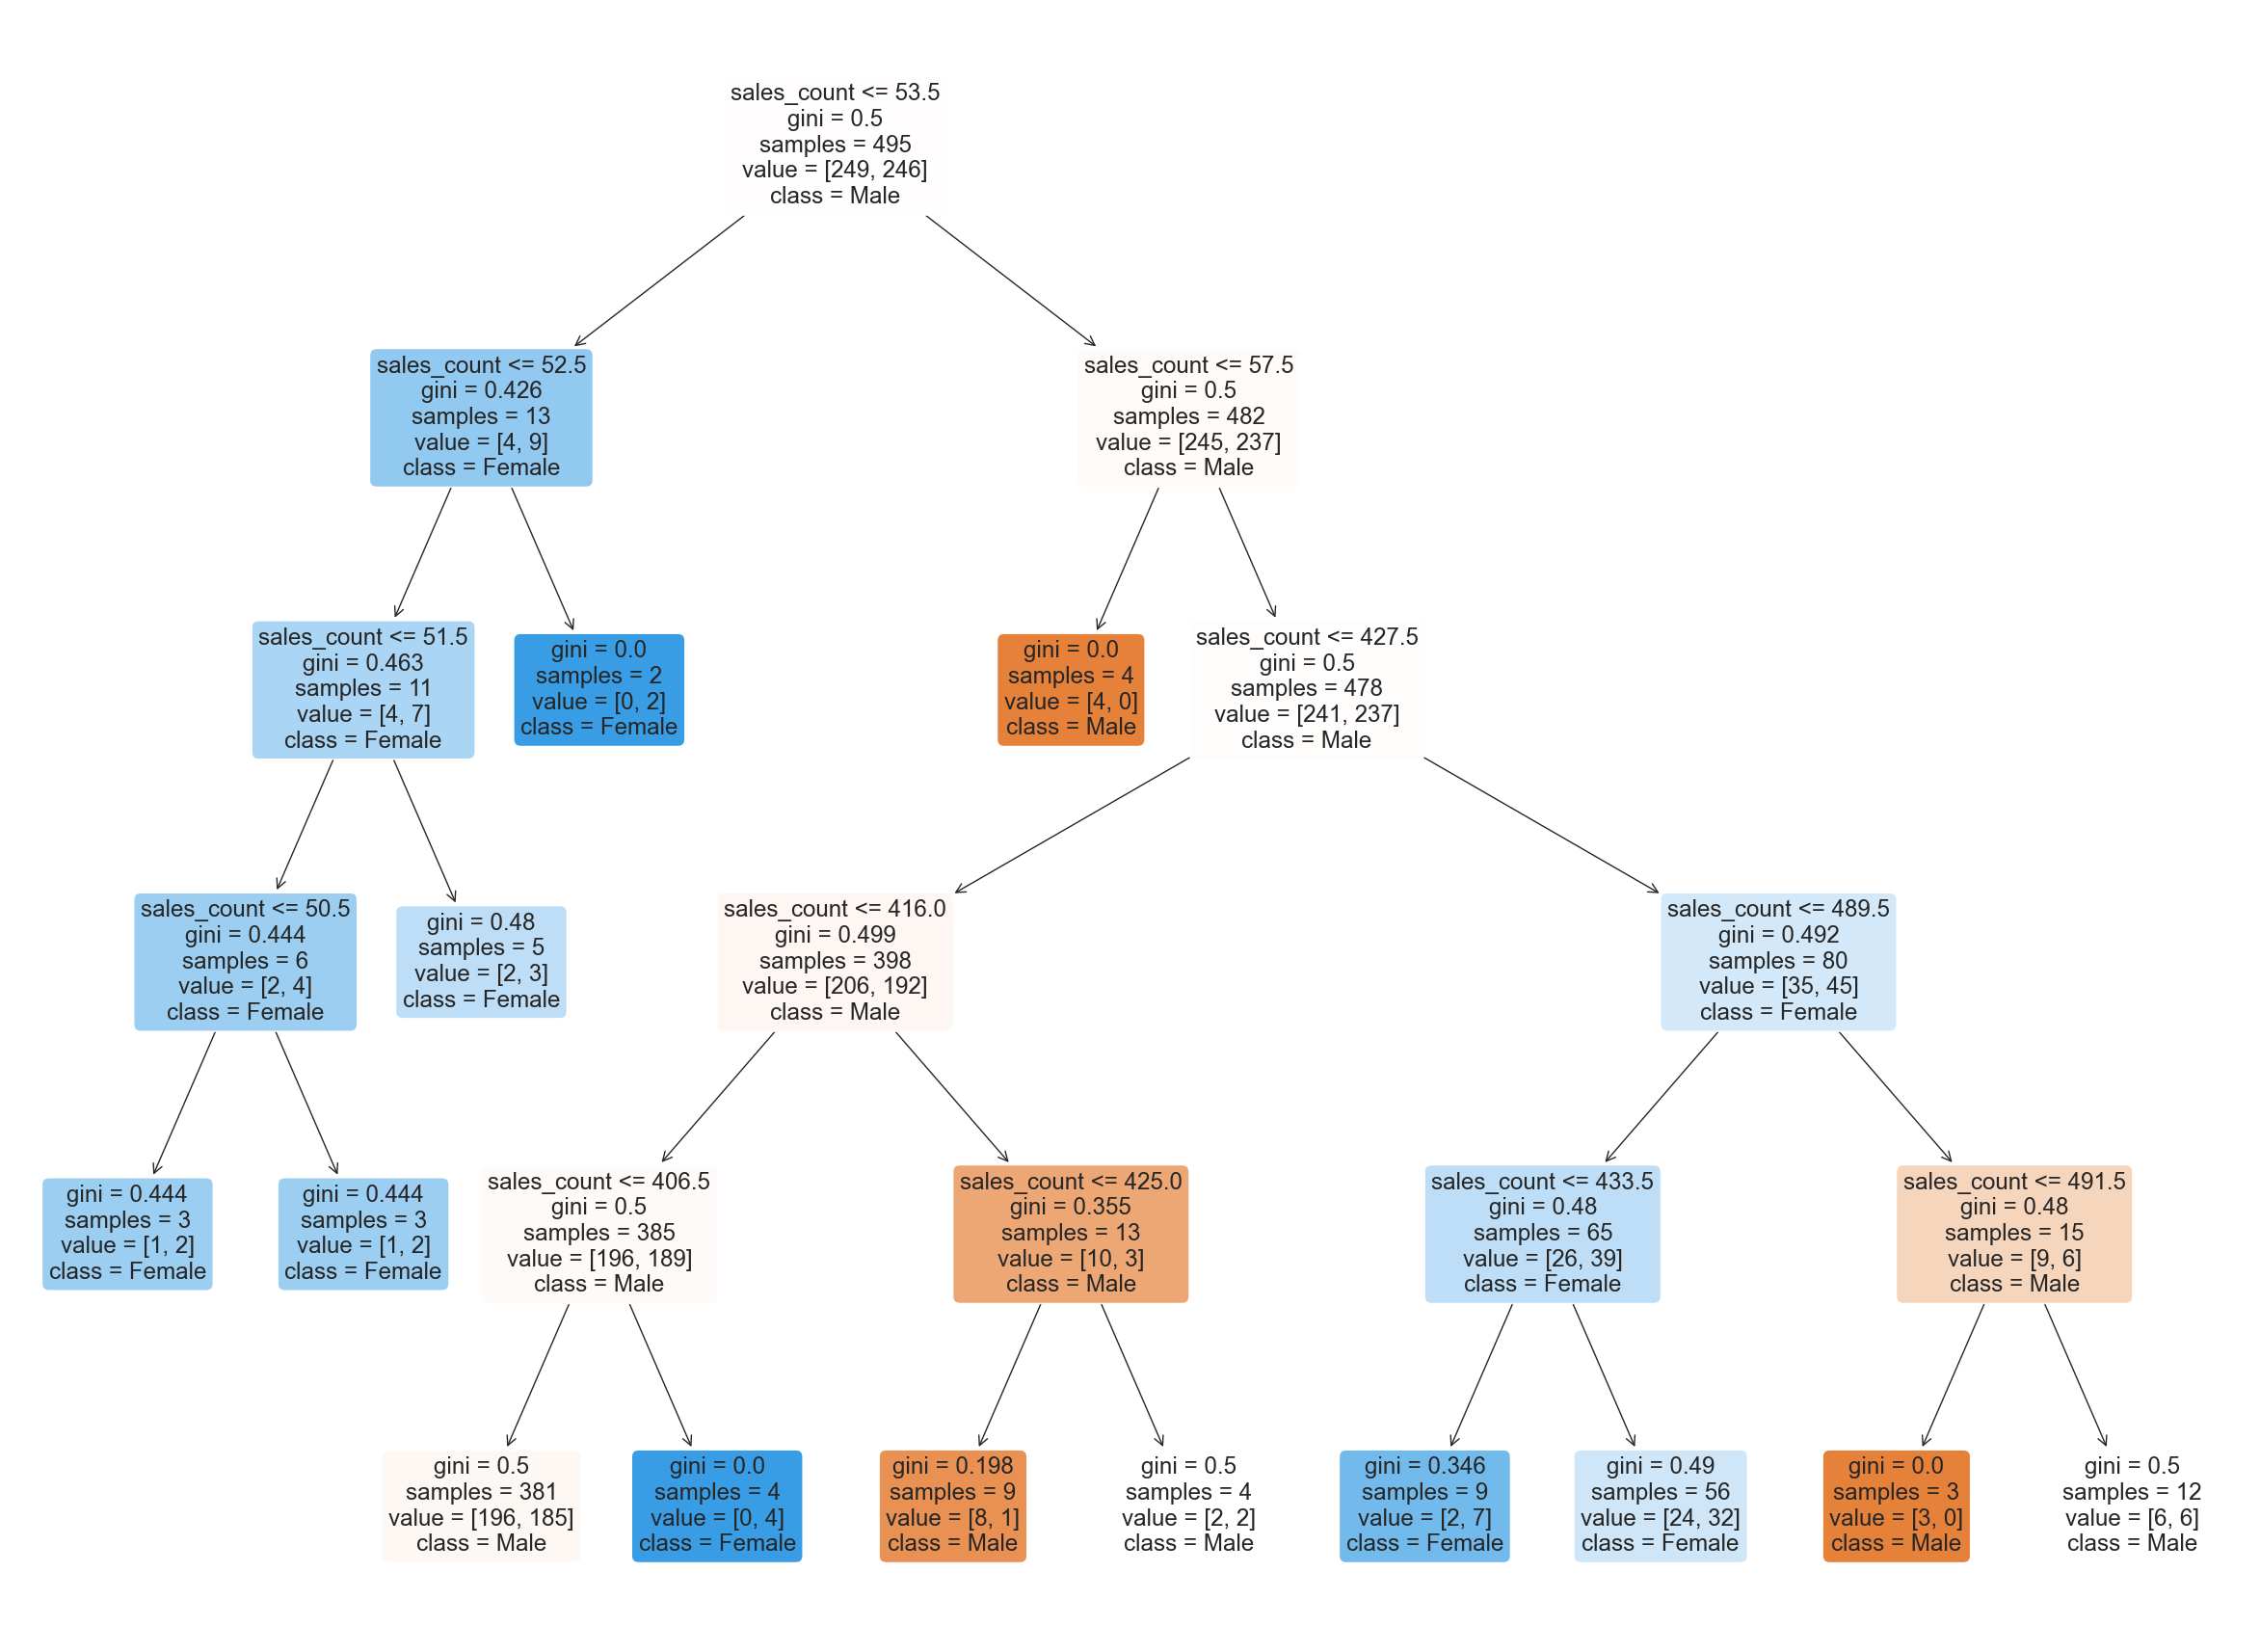

In [13]:
Tree.fit(X_train, y_train)
f = plt.figure(figsize=(30,22)) 
plot_tree(Tree, filled=True, rounded=True, feature_names=X_train.columns.tolist(), class_names=["Male", "Female"])

# Confusion Matrix and Performance Metrics for Training Data

<Axes: >

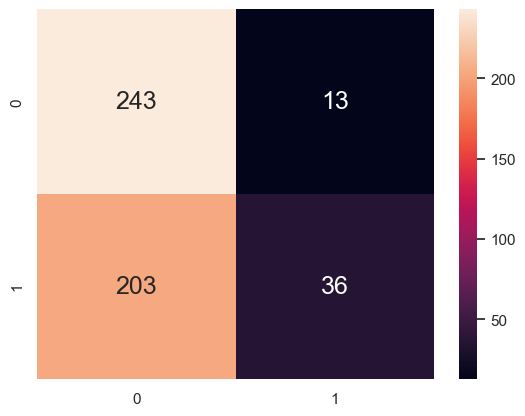

In [8]:
y_train_pred = Tree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [9]:
print("Train Data - Tree")
print("Classification Accuracy  :\t", Tree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(fnTrain + tpTrain)))

Train Data - Tree
Classification Accuracy  :	 0.5636363636363636

TPR Train :	 0.1506276150627615
FPR Train :	 0.05078125
TNR Train :	 0.94921875
FNR Train :	 0.8493723849372385


# Confusion Matrix and Performance Metrics for Testing Data

<Axes: >

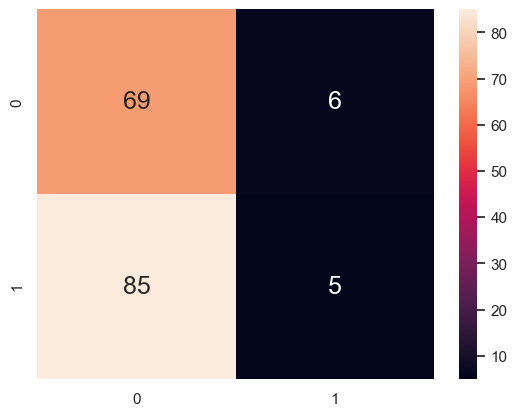

In [10]:
y_test_pred = Tree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [11]:
print("Test Data - Tree")
print("Classification Accuracy  :\t", Tree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(fnTrain + tpTrain)))

Test Data - Tree
Classification Accuracy  :	 0.4484848484848485

TPR Train :	 0.1506276150627615
FPR Train :	 0.05078125
TNR Train :	 0.94921875
FNR Train :	 0.8493723849372385
